In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('attrition_data.csv')
df.head()

,ID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,32,No,Travel_Rarely,117,Sales,13,4,Life Sciences,1,...,3,80,1,8,3,2,5,2,0,3
1,2,40,No,Travel_Rarely,1308,Research & Development,14,3,Medical,1,...,1,80,0,21,2,4,20,7,4,9
2,3,35,No,Travel_Frequently,200,Research & Development,18,2,Life Sciences,1,...,3,80,0,10,2,3,2,2,2,2
3,4,32,No,Travel_Rarely,801,Sales,1,4,Marketing,1,...,3,80,2,14,3,3,14,10,5,7
4,5,24,No,Travel_Frequently,567,Research & Development,2,1,Technical Degree,1,...,3,80,0,6,2,3,6,3,1,3


In [25]:
df.isna().sum()

ID                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

### Heavy imbalance in our Target variable (attrition) 

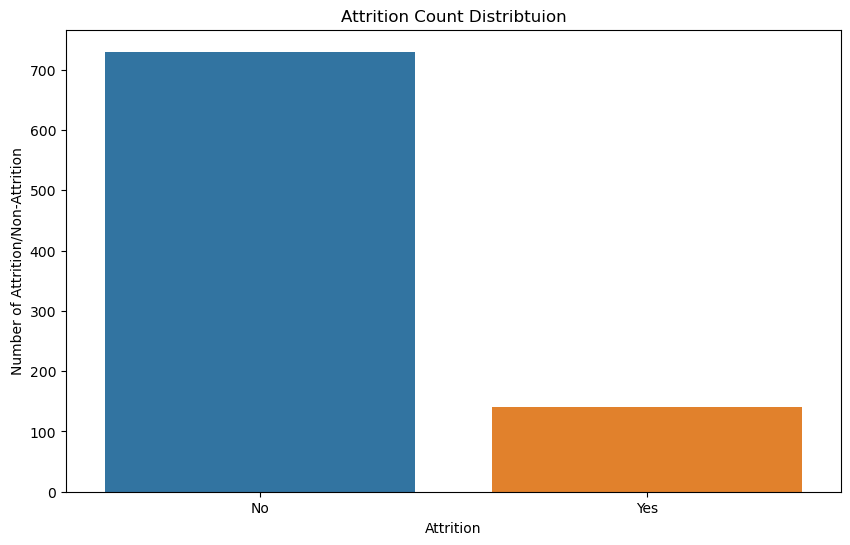

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'Attrition')
plt.title('Attrition Count Distribtuion')
plt.xlabel('Attrition')
plt.ylabel('Number of Attrition/Non-Attrition')
plt.show()

In [27]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,870.0,435.500000,251.291663,1.0,218.25,435.5,652.75,870.0
Age,870.0,36.828736,8.925950,18.0,30.00,35.0,43.00,60.0
DailyRate,870.0,815.227586,401.116280,103.0,472.50,817.5,1165.75,1499.0
DistanceFromHome,870.0,9.339080,8.136704,1.0,2.00,7.0,14.00,29.0
Education,870.0,2.901149,1.023037,1.0,2.00,3.0,4.00,5.0
EmployeeCount,870.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,870.0,1029.832184,604.789297,1.0,477.25,1039.0,1561.50,2064.0
EnvironmentSatisfaction,870.0,2.701149,1.099377,1.0,2.00,3.0,4.00,4.0
HourlyRate,870.0,65.613793,20.127163,30.0,48.00,66.0,83.00,100.0
JobInvolvement,870.0,2.722989,0.703632,1.0,2.00,3.0,3.00,4.0


In [28]:
df.drop(['ID', 'EmployeeCount', 'EmployeeNumber', 'Over18','StandardHours'], axis =1 , inplace = True)

In [29]:
bin_edges = [18,25,35,45,60]
bin_labels = ['18-25', '26-35', '36-45','46-60']
df['age_cat'] = pd.cut(df['Age'], bins = bin_edges, labels = bin_labels)


bin_edges = [1,10,20,30]
bin_labels= ['1-10','11-20','21-30']
df['dist_cat'] = pd.cut(df['DistanceFromHome'], bins = bin_edges, labels=bin_labels)

df.drop('DistanceFromHome', inplace = True, axis =1)
df.drop('Age', axis = 1, inplace = True)

In [30]:
columns_to_drop = ['age_cat','dist_cat','Department','Education','EducationField',
                'EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel',
                'JobRole','JobSatisfaction','MaritalStatus','OverTime',
                'PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
                'TrainingTimesLastYear','WorkLifeBalance']

df_encoded = pd.get_dummies(df, columns = df.columns.difference(columns_to_drop), drop_first = True)

In [31]:
df[columns_to_drop] = df[columns_to_drop].astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition                 870 non-null    object  
 1   BusinessTravel            870 non-null    object  
 2   DailyRate                 870 non-null    int64   
 3   Department                870 non-null    category
 4   Education                 870 non-null    category
 5   EducationField            870 non-null    category
 6   EnvironmentSatisfaction   870 non-null    category
 7   Gender                    870 non-null    category
 8   HourlyRate                870 non-null    int64   
 9   JobInvolvement            870 non-null    category
 10  JobLevel                  870 non-null    category
 11  JobRole                   870 non-null    category
 12  JobSatisfaction           870 non-null    category
 13  MaritalStatus             870 non-null    category

In [33]:
for i in df.columns:
    print(f"Column {i}\n", df[i].value_counts(), '\n')

Column Attrition
 No     730
Yes    140
Name: Attrition, dtype: int64 

Column BusinessTravel
 Travel_Rarely        618
Travel_Frequently    158
Non-Travel            94
Name: BusinessTravel, dtype: int64 

Column DailyRate
 117     4
465     4
933     4
530     4
1157    4
       ..
466     1
1012    1
1397    1
1184    1
1457    1
Name: DailyRate, Length: 627, dtype: int64 

Column Department
 Research & Development    562
Sales                     273
Human Resources            35
Name: Department, dtype: int64 

Column Education
 3    324
4    240
2    182
1     98
5     26
Name: Education, dtype: int64 

Column EducationField
 Life Sciences       358
Medical             270
Marketing           100
Technical Degree     75
Other                52
Human Resources      15
Name: EducationField, dtype: int64 

Column EnvironmentSatisfaction
 4    262
3    258
2    178
1    172
Name: EnvironmentSatisfaction, dtype: int64 

Column Gender
 Male      516
Female    354
Name: Gender, dtype: i

In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Separate the target variable
target = df['Attrition']
data = df.drop(columns=['Attrition'])

# Scale the integer variables
int_columns = data.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
data[int_columns] = scaler.fit_transform(data[int_columns])

# Create dummy variables for object and category variables
object_cat_columns = data.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(data[object_cat_columns])
encoded_columns = encoder.get_feature_names_out(object_cat_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
data = pd.concat([data, encoded_df], axis=1)
data.drop(columns=object_cat_columns, inplace=True)

# Rejoin the target variable
data = pd.concat([data, target], axis=1)

label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])

C:\Users\Joey\anaconda3\envs\ML\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
cor_values = data.corr()
cor_values['Attrition'].sort_values(ascending = True)

StockOptionLevel_1                  -0.191745
TotalWorkingYears                   -0.167206
YearsInCurrentRole                  -0.156216
MonthlyIncome                       -0.154915
YearsWithCurrManager                -0.146782
JobLevel_2                          -0.131795
YearsAtCompany                      -0.128754
JobRole_Manufacturing Director      -0.125122
age_cat_36-45                       -0.121837
StockOptionLevel_2                  -0.108021
JobSatisfaction_4                   -0.105433
Department_Research & Development   -0.100973
JobInvolvement_3                    -0.099962
JobRole_Research Director           -0.095965
JobLevel_4                          -0.082155
JobInvolvement_4                    -0.064961
TrainingTimesLastYear_5             -0.056494
JobRole_Manager                     -0.056018
MaritalStatus_Married               -0.049988
Education_4                         -0.046336
EnvironmentSatisfaction_3           -0.044635
EducationField_Medical            

In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso model
lasso = Lasso(alpha=0.02)  # You can adjust the alpha parameter

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[lasso.coef_ != 0]

# Apply feature selection to the test data
X_test_selected = X_test[selected_features]

# Print out coefficients for selected features
print("Coefficients:")
for feature, coef in zip(selected_features, lasso.coef_[lasso.coef_ != 0]):
    print(f"{feature}: {coef:.4f}")

Coefficients:
MonthlyIncome: -0.0280
NumCompaniesWorked: 0.0127
TotalWorkingYears: -0.0091
YearsInCurrentRole: -0.0132
YearsSinceLastPromotion: 0.0043
YearsWithCurrManager: -0.0084
JobLevel_2: -0.0134
JobSatisfaction_4: -0.0009
MaritalStatus_Single: 0.0085
OverTime_Yes: 0.1183
StockOptionLevel_1: -0.0487


In [53]:
selected_features = [
    'MonthlyIncome',
    'NumCompaniesWorked',
    'TotalWorkingYears',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',
    'JobLevel_2',
    'JobSatisfaction_4',
    'MaritalStatus_Single',
    'OverTime_Yes',
    'StockOptionLevel_1',
    'JobRole_Sales Representative'
]


In [54]:
# Separate features and target
X = data[selected_features]
y = data['Attrition']

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Separate features and target
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Find the best k using GridSearchCV
k_values = list(range(1, 21))  # You can adjust the range of k values
param_grid = {'n_neighbors': k_values}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)
best_k = grid_search.best_params_['n_neighbors']

# Print the best K value
print("Best K:", best_k)

Best K: 2


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       187
           1       0.28      0.71      0.40        31

    accuracy                           0.70       218
   macro avg       0.61      0.70      0.60       218
weighted avg       0.84      0.70      0.74       218


Confusion Matrix:
[[130  57]
 [  9  22]]


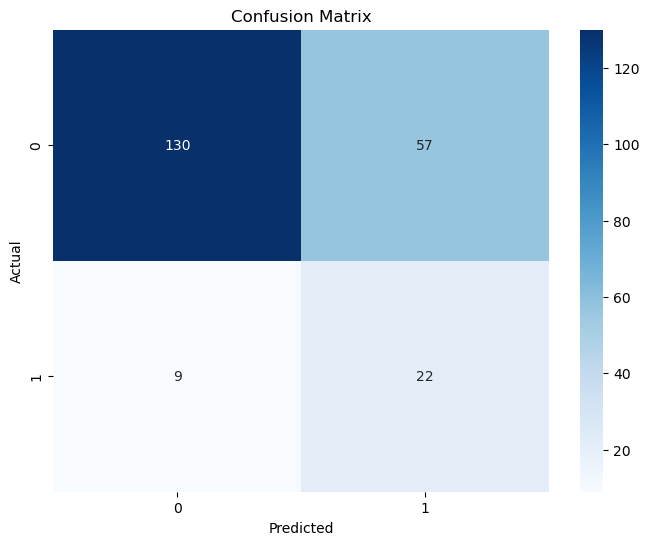

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       187
           1       0.28      0.71      0.40        31

    accuracy                           0.70       218
   macro avg       0.61      0.70      0.60       218
weighted avg       0.84      0.70      0.74       218



In [56]:
# Initialize KNN model with the best k
best_k = 2  # You can use the best K value determined earlier
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Fit the KNN model to the resampled training data
knn_best.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = knn_best.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {
    'n_estimators':[10,50,100,200,300],
    'max_depth':[None, 10,20,30],
    'criterion':['gini','entropy','log_loss']
}

grid_search = GridSearchCV(rf, param_grid, cv = 3, n_jobs =-1, verbose =2)

grid_search.fit(X_train_resampled, y_train_resampled)

print('Best Params', grid_search.best_params_)
print('Best Cross-val Score', grid_search.best_score_)

test_score = grid_search.score(X_test, y_test)
print('Test Score', test_score)

TypeError: __init__() got an unexpected keyword argument 'random_state'

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       187
           1       0.83      0.32      0.47        31

    accuracy                           0.89       218
   macro avg       0.87      0.66      0.70       218
weighted avg       0.89      0.89      0.87       218


Confusion Matrix:
[[185   2]
 [ 21  10]]


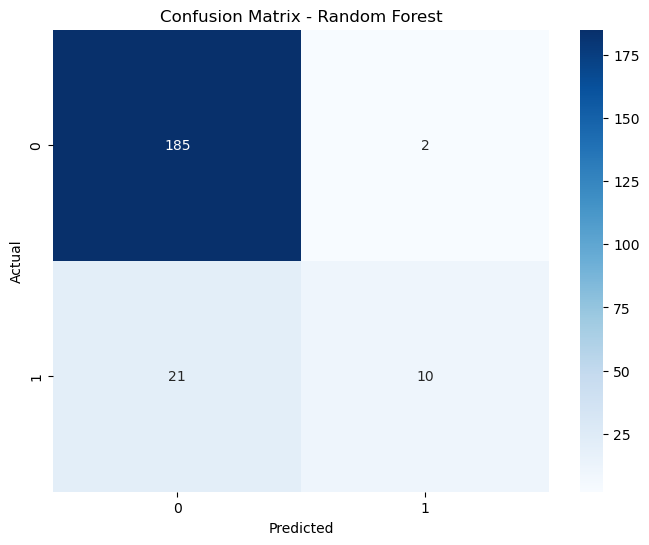

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       187
           1       0.83      0.32      0.47        31

    accuracy                           0.89       218
   macro avg       0.87      0.66      0.70       218
weighted avg       0.89      0.89      0.87       218



In [59]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest model
random_forest = RandomForestClassifier(random_state=12, criterion='gini',max_depth=10, n_estimators = 50)

# Fit the Random Forest model to the resampled training data
random_forest.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = random_forest.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.67      0.79       187
           1       0.27      0.74      0.40        31

    accuracy                           0.68       218
   macro avg       0.61      0.71      0.59       218
weighted avg       0.85      0.68      0.73       218


Confusion Matrix:
[[126  61]
 [  8  23]]


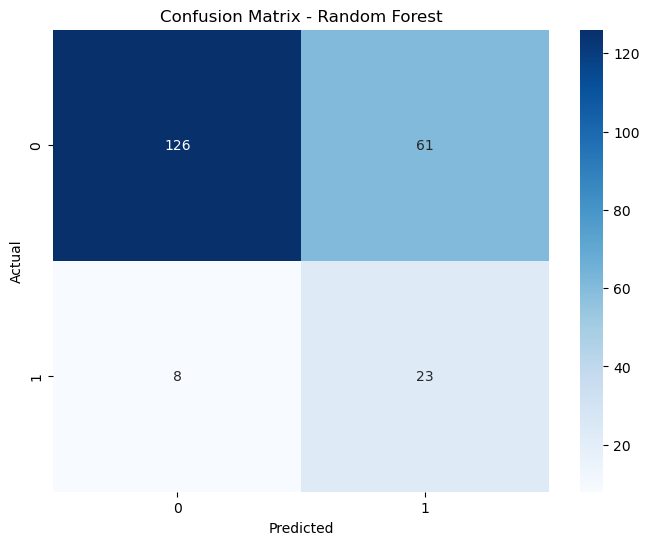

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.67      0.79       187
           1       0.27      0.74      0.40        31

    accuracy                           0.68       218
   macro avg       0.61      0.71      0.59       218
weighted avg       0.85      0.68      0.73       218



In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Assume X_train_resampled, y_train_resampled, X_test, and y_test are defined

# Initialize Random Forest model
random_forest = RandomForestClassifier(random_state=12, criterion='gini', max_depth=10, n_estimators=50)

# Fit the Random Forest model to the resampled training data
random_forest.fit(X_train_resampled, y_train_resampled)

# Predict probabilities on the test data
y_prob = random_forest.predict_proba(X_test)

# Set a threshold value for positive class
threshold = 0.22

# Convert probabilities to binary predictions based on the threshold
y_pred = (y_prob[:, 1] > threshold).astype(int)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
